In [1]:
import json 
import numpy as np 
import os 
import glob 
import json

In [2]:
def get_statistic_results(json_files):
    si_sdr_imps, stois = [], []
    for json_file in json_files:
        with open(json_file, 'r') as wf:
            json_data = json.load(wf)
        si_sdr_imps.append(json_data['si_sdr_imp'])
        stois.append(json_data['stoi'])
    print("si sdr: ", np.average(si_sdr_imps))
    print("stoi: ", np.average(stois)) 
    return np.average(si_sdr_imps), np.average(stois)

In [7]:
# causal_static
# result_folder = "/data1/wangyiwen/repos/graduateproject/speakerbeam/egs/libri2mix/exp/20240629_mixloss/out_forward_streaming_ddp_random_seed_2203/"
result_folder = "/data1/wangyiwen/repos/graduateproject/speakerbeam/egs/libri2mix_sep2vec/exp/20240717_mixloss_autoregression_fixed_pretrained_32sample_50epochcircle/epoch99_ddpoutput"
json_files = glob.glob(f"{result_folder}/*.json")
get_statistic_results(json_files)

si sdr:  4.94819485847019
stoi:  0.7305196911579436


(4.94819485847019, 0.7305196911579436)

In [17]:
# causal_dynamic
result_folder = "/data1/wangyiwen/repos/graduateproject/speakerbeam/egs/libri2mix_sep2vec/exp/20240717_mixloss_autoregression_fixed_pretrained_32sample_50epochcircle/epoch349_randomseed2203/"
json_files = glob.glob(f"{result_folder}/*.json")
get_statistic_results(json_files)

si sdr:  6.221900806762278
stoi:  0.7756416119123976


(6.221900806762278, 0.7756416119123976)

In [18]:
# causal_dynamic_nopretrained
result_folder = "/data1/wangyiwen/repos/graduateproject/speakerbeam/egs/libri2mix_sep2vec/exp/20240702_mixloss_autoregression_nopretrained_16sample_50epochcircle/349epoch"
json_files = glob.glob(f"{result_folder}/*.json")
get_statistic_results(json_files)

si sdr:  -7.107781460235758
stoi:  0.3946424976716832


(-7.107781460235758, 0.3946424976716832)

In [19]:
result_folder = "/data1/wangyiwen/repos/graduateproject/speakerbeam/egs/libri2mix_sep2vec/exp/20240812_mixloss_autoregression_fixed_pretrained_128sample_50epochcircle/epoch249"
json_files = glob.glob(f"{result_folder}/*.json")
get_statistic_results(json_files)

si sdr:  5.9537116712735
stoi:  0.7539987511760157


(5.9537116712735, 0.7539987511760157)

In [5]:
# [16]
result_folder = "/data1/wangyiwen/repos/graduateproject/speakerbeam/egs/libri2mix_sep2vec/exp/20240630_mixloss_autoregression_fixed_pretrained_16sample_50epochcircle/epoch349_randomseed2203"
json_files = glob.glob(f"{result_folder}/*.json")
get_statistic_results(json_files)

si sdr:  6.07886471634086
stoi:  0.7579988749095513


(6.07886471634086, 0.7579988749095513)

In [6]:
# [32]
result_folder = "/data1/wangyiwen/repos/graduateproject/speakerbeam/egs/libri2mix_sep2vec/exp/20240717_mixloss_autoregression_fixed_pretrained_32sample_50epochcircle/epoch349_randomseed2203"
json_files = glob.glob(f"{result_folder}/*.json")
get_statistic_results(json_files)

si sdr:  6.221900806762278
stoi:  0.7756416119123976


(6.221900806762278, 0.7756416119123976)

In [15]:
# [64]
# result_folder = "/data1/wangyiwen/repos/graduateproject/speakerbeam/egs/libri2mix_sep2vec/exp/20240630_mixloss_autoregression_fixed_pretrained_16sample_50epochcircle/epoch349_randomseed2203_test"
result_folder = "/data1/wangyiwen/repos/graduateproject/speakerbeam/egs/libri2mix_sep2vec/exp/20240630_mixloss_autoregression_fixed_pretrained_16sample_50epochcircle/direct_output_349epoch"
json_files = glob.glob(f"{result_folder}/*.json")
get_statistic_results(json_files)

si sdr:  7.909795961264981
stoi:  0.802176449293341


(7.909795961264981, 0.802176449293341)

In [8]:
# [128]
result_folder = '/data1/wangyiwen/repos/graduateproject/speakerbeam/egs/libri2mix_sep2vec/exp/20240812_mixloss_autoregression_fixed_pretrained_128sample_50epochcircle/epoch249'
json_files = glob.glob(f"{result_folder}/*.json")
get_statistic_results(json_files)

si sdr:  5.9537116712735
stoi:  0.7539987511760157


(5.9537116712735, 0.7539987511760157)

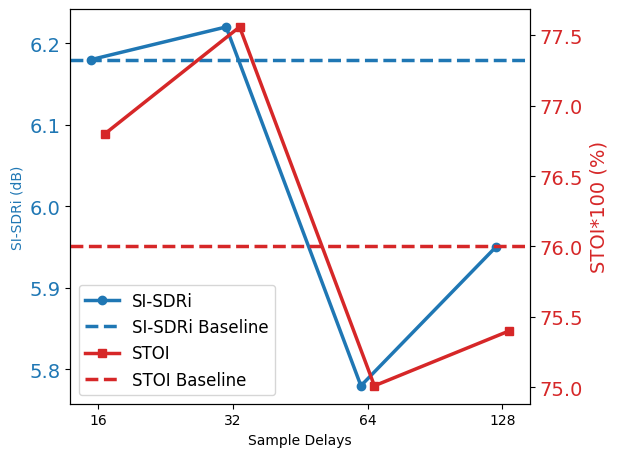

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
x_values = np.array([1, 2, 3, 4])
labels = [16, 32, 64, 128]
si_sdrs = [6.18, 6.22, 5.78, 5.95]
stois = [76.80, 77.56, 75.01, 75.40]

fig, ax1 = plt.subplots()

# 调整字体大小和线条宽度
plt.rcParams.update({'font.size': 14})
linewidth = 2.5

# 绘制SI-SDRs
color = 'tab:blue'
ax1.set_xlabel('Sample Delays')
ax1.set_ylabel('SI-SDRi (dB)', color=color)
line1, = ax1.plot(x_values - 0.05, si_sdrs, color=color, marker='o', label='SI-SDRi', linewidth=linewidth)  # 向左平移SI-SDR
ax1.tick_params(axis='y', labelcolor=color, labelsize=14)
ax1.set_xticks(x_values)
ax1.set_xticklabels(labels)  # 将x轴的标签设置为16, 32, 64, 128

# 添加SI-SDR的均值线
line2 = ax1.axhline(y=6.18, color=color, linestyle='--', linewidth=linewidth, label='SI-SDRi Baseline')

# 创建第二个y轴用于STOIs
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('STOI*100 (%)', color=color)
line3, = ax2.plot(x_values + 0.05, stois, color=color, marker='s', label='STOI', linewidth=linewidth)  # 向右平移STOI
ax2.tick_params(axis='y', labelcolor=color, labelsize=14)

# 添加STOI的均值线
line4 = ax2.axhline(y=76.00, color=color, linestyle='--', linewidth=linewidth, label='STOI Baseline')

# 添加图例，位置在左下侧
lines = [line1, line2, line3, line4]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='lower left', fontsize=12)

fig.tight_layout()  # 调整布局以防止重叠
# plt.title('SI-SDR and STOI Comparison', fontsize=16)

plt.show()


In [10]:
# statustic different lengths
STOI_epochs, SDR_epochs = [], []
for idx in range(8):
    epoch_number = idx*50 + 49
    folder_path = f"/data1/wangyiwen/repos/graduateproject/speakerbeam/egs/libri2mix_sep2vec/exp/20240717_mixloss_autoregression_fixed_pretrained_32sample_50epochcircle/epoch{epoch_number}_randomseed2203"
    json_files = glob.glob(f"{folder_path}/*.json")
    sdr, stoi = get_statistic_results(json_files)
    STOI_epochs.append(stoi)
    SDR_epochs.append(sdr)

si sdr:  1.472185796889394
stoi:  0.5980018206614413
si sdr:  4.94819485847019
stoi:  0.7305196911579436
si sdr:  5.525115080912932
stoi:  0.7442806160400602
si sdr:  5.51449966792236
stoi:  0.7442195652564743
si sdr:  5.4986549041289345
stoi:  0.7431175153852377
si sdr:  5.506252618526414
stoi:  0.7442378710374971
si sdr:  6.221900806762278
stoi:  0.7756416119123976
si sdr:  6.221352047597368
stoi:  0.7756298876906786


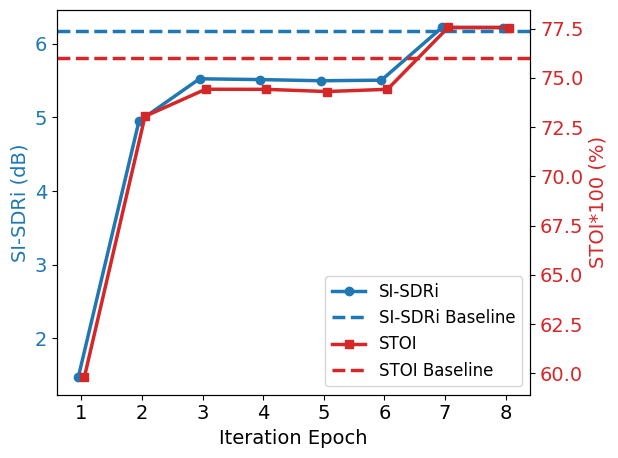

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
x_values = np.array([1, 2, 3, 4, 5, 6, 7, 8])
# labels = [16, 32, 64, 128]
labels = [1, 2, 3, 4, 5, 6, 7, 8]
# si_sdrs = [6.18, 6.22, 5.78, 5.95]
# stois = [76.80, 77.56, 75.01, 75.40]
stois = np.array(STOI_epochs)*100
si_sdrs = np.array(SDR_epochs)

fig, ax1 = plt.subplots()

# 调整字体大小和线条宽度
plt.rcParams.update({'font.size': 14})
linewidth = 2.5

# 绘制SI-SDRs
color = 'tab:blue'
ax1.set_xlabel('Iteration Epoch')
ax1.set_ylabel('SI-SDRi (dB)', color=color)
line1, = ax1.plot(x_values - 0.05, si_sdrs, color=color, marker='o', label='SI-SDRi', linewidth=linewidth)  # 向左平移SI-SDR
ax1.tick_params(axis='y', labelcolor=color, labelsize=14)
ax1.set_xticks(x_values)
ax1.set_xticklabels(labels)  # 将x轴的标签设置为16, 32, 64, 128

# 添加SI-SDR的均值线
line2 = ax1.axhline(y=6.18, color=color, linestyle='--', linewidth=linewidth, label='SI-SDRi Baseline')

# 创建第二个y轴用于STOIs
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('STOI*100 (%)', color=color)
line3, = ax2.plot(x_values + 0.05, stois, color=color, marker='s', label='STOI', linewidth=linewidth)  # 向右平移STOI
ax2.tick_params(axis='y', labelcolor=color, labelsize=14)

# 添加STOI的均值线
line4 = ax2.axhline(y=76.00, color=color, linestyle='--', linewidth=linewidth, label='STOI Baseline')

# 添加图例，位置在左下侧
lines = [line1, line2, line3, line4]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='lower right', fontsize=12)

fig.tight_layout()  # 调整布局以防止重叠
# plt.title('SI-SDR and STOI Comparison', fontsize=16)

plt.show()
